In [2]:
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
import torch.optim as optim
import numpy as np
print(torch.cuda.is_available())

True


In [5]:

device = torch.device('cuda')
batch_size=100
trans = torchvision.transforms.ToTensor()
mnist_train = torchvision.datasets.MNIST(
    root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.MNIST(
    root="./data", train=False, transform=trans, download=True)

def batch_data(X,batch_size,device=torch.device('cuda')):
    temp_x=[i[0][0].unsqueeze_(0) for i in X]#升维再导入
    data_x=torch.cat(temp_x).reshape(batch_size,-1,28,28).unsqueeze_(2)#加上通道数
    data_y=torch.tensor([i[1] for i in X]).reshape(batch_size,-1)
    return data_x.to(device),data_y.to(device)

def plot_res():
    fig,ax=plt.subplots(1,2)
    for i in range(len(loss_arr)):
        if(isinstance(loss_arr[i],np.ndarray)==False):
            loss_arr[i]=loss_arr[i].to(torch.device('cpu')).detach().numpy()

    ax[0].plot(range(len(loss_arr)),loss_arr)
    ax[1].plot(range(len(loss_arr)),acc_arr)

    plt.tight_layout()
    # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    #     wspace=0.45, hspace=None)
    ax[0].set_title("loss")
    ax[1].set_title("accuracy")
    plt.show()

def start_train():
    net.train()#启用 BatchNormalization 和 Dropout
    for i in range(epoch):
        for j in range(batch_size):
            optimizer.zero_grad()
            y_hat=net(train_x[j])
            l=loss(y_hat,train_y[j])
            l.backward()
            optimizer.step()
        cur_acc=calc_acc(test_x.reshape((-1,1,28,28)),test_y.reshape(-1,1),net)
        print(f'loss= {l:.3f} accuracy={cur_acc:.3f}')        
        loss_arr.append(l)
        acc_arr.append(cur_acc)
        
def calc_acc(X,y,net):
    tot=0
    res=net(X)
    for i in range(X.shape[0]):
        if(res[i].argmax().item()==y[i].item()):
            tot+=1
    return tot/X.shape[0]
        
batch_size=100
(train_x,train_y)=batch_data(mnist_train,batch_size,device)
(test_x,test_y)=batch_data(mnist_test,batch_size,device)


test_x.shape

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5017994.01it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 146450.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1197014.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2325504.00it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([100, 100, 1, 28, 28])

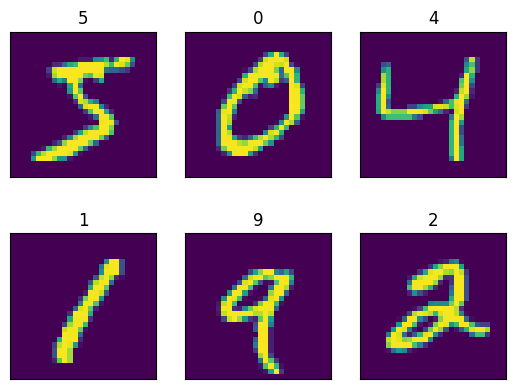

In [3]:

text_labels =range(10)
fig,axes=plt.subplots(2,3)
axes=axes.flatten()#一维
for i in range(6):
    ax=axes[i]
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(train_x[0][i][0].cpu())
    ax.set_title(text_labels[train_y[0][i].cpu()])
plt.show()#必须放在cpu上

# RNN

RNN：使用nn.RNN定义了一个简单的循环神经网络。

hidden_size设置为128。

num_layers为2。

sequence_length和input_size都为28，对应MNIST数据集中图像的高度。

In [18]:
hidden_size = 128
num_layers = 2
num_classes = 10
sequence_length = 28
input_size = 28

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes) # MLP分类头
    
    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device) #初始化为零张量
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :] # 选择最后一个时间步的输出
        out = self.fc(out)
        return out
    
def start_train():
    net.train()#启用 BatchNormalization 和 Dropout
    for i in range(epoch):
        for j in range(batch_size):
            optimizer.zero_grad()
            images = train_x[j].reshape(-1, sequence_length, input_size).to(device) # 将图片转成序列
            y_hat=net(images)
            l=loss(y_hat,train_y[j])
            l.backward()
            optimizer.step()
        cur_acc=calc_acc(test_x.reshape(-1, sequence_length, input_size).to(device),test_y.reshape(-1,1),net) 
        if i%10==0:
            print(f'epoch {i} loss= {l:.3f} accuracy={cur_acc:.3f}')     
        loss_arr.append(l)
        acc_arr.append(cur_acc)
        
net = RNNModel(input_size, hidden_size, num_layers, num_classes).to(device)
lr=0.001
epoch=100
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
loss=nn.CrossEntropyLoss()

loss_arr,acc_arr=[],[]
start_train()

epoch 0 loss= 0.745 accuracy=0.721
epoch 10 loss= 0.125 accuracy=0.960
epoch 20 loss= 0.064 accuracy=0.974
epoch 30 loss= 0.063 accuracy=0.971
epoch 40 loss= 0.060 accuracy=0.977
epoch 50 loss= 0.039 accuracy=0.979
epoch 60 loss= 0.046 accuracy=0.980
epoch 70 loss= 0.038 accuracy=0.980
epoch 80 loss= 0.021 accuracy=0.983
epoch 90 loss= 0.020 accuracy=0.985


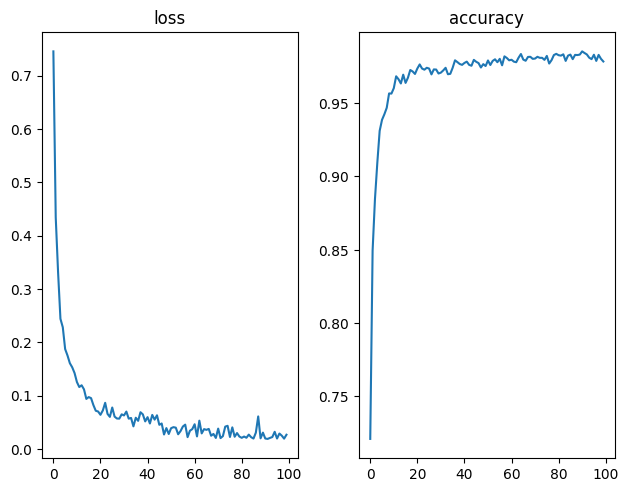

In [19]:
plot_res()

LSTM：使用nn.LSTM定义了长短期记忆网络，适合捕获长距离依赖关系。

## LSTM

In [20]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        out = self.fc(out)
        return out


    
net = LSTMModel(input_size, hidden_size, num_layers, num_classes).to(device)
lr=0.001
epoch=100
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
loss=nn.CrossEntropyLoss()

loss_arr,acc_arr=[],[]
start_train()

epoch 0 loss= 0.417 accuracy=0.834
epoch 10 loss= 0.069 accuracy=0.982
epoch 20 loss= 0.040 accuracy=0.986
epoch 30 loss= 0.022 accuracy=0.989
epoch 40 loss= 0.015 accuracy=0.988
epoch 50 loss= 0.010 accuracy=0.988
epoch 60 loss= 0.010 accuracy=0.989
epoch 70 loss= 0.005 accuracy=0.988
epoch 80 loss= 0.001 accuracy=0.990
epoch 90 loss= 0.001 accuracy=0.990


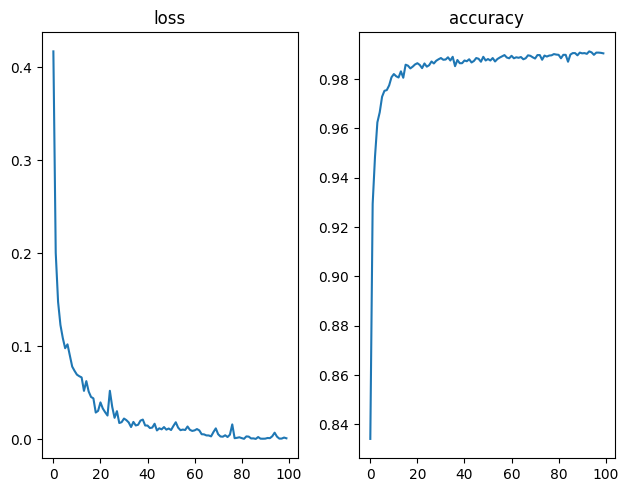

In [21]:
plot_res()

## GRU

GRU：使用nn.GRU定义了门控循环单元网络，与LSTM类似但参数更少。

In [22]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
        out, _ = self.gru(x, h0)
        out = out[:, -1, :]
        out = self.fc(out)
        return out
net = GRUModel(input_size, hidden_size, num_layers, num_classes).to(device)
lr=0.001
epoch=100
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
loss=nn.CrossEntropyLoss()

loss_arr,acc_arr=[],[]
start_train()

epoch 0 loss= 0.509 accuracy=0.810
epoch 10 loss= 0.056 accuracy=0.985
epoch 20 loss= 0.028 accuracy=0.986
epoch 30 loss= 0.026 accuracy=0.985
epoch 40 loss= 0.018 accuracy=0.989
epoch 50 loss= 0.007 accuracy=0.989
epoch 60 loss= 0.004 accuracy=0.989
epoch 70 loss= 0.000 accuracy=0.989
epoch 80 loss= 0.001 accuracy=0.990
epoch 90 loss= 0.000 accuracy=0.989


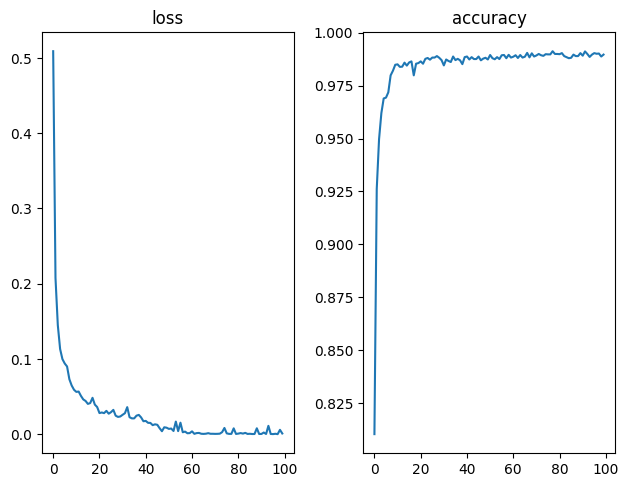

In [23]:
plot_res()

## 实验结果

RNN模型的准确率在98.5%左右。

LSTM模型的准确率在99%左右。

GRU模型的准确率接近99%。